# Perception
Perceptron is considered a single-layer neural link with four main parameters. The perceptron model begins with multiplying all input values and their weights, then adds these values to create the weighted sum. Further, this weighted sum is applied to the activation function ‘f’ to obtain the desired output. This activation function is also known as the step function and is represented by ‘f’

<p align="center">
    <img src="Perceptron1.png" width="700">
</p>

This step function or Activation function is vital in ensuring that output is mapped between (0,1) or (-1,1). Take note that the weight of input indicates a node’s strength. Similarly, an input value gives the ability the shift the activation function curve up or down.

Step 1: Multiply all input values with corresponding weight values and then add to calculate the weighted sum. The following is the mathematical expression of it:

$$
\sum w_i*x_i = x_1*w_1 + x_2*w_2 + x_3*w_3+...+x_m*w_m
$$


Add a term called bias ‘b’ to this weighted sum to improve the model’s performance.

Step 2:  An activation function is applied with the above-mentioned weighted sum giving us an output either in binary form or a continuous value as follows:

$$
Y=f(\sum w_i*x_i + b)
$$



### Characteristics of the Perceptron Model

The following are the characteristics of a Perceptron Model:

1. It is a machine learning algorithm that uses supervised learning of binary classifiers.
2. In Perceptron, the weight coefficient is automatically learned.
3. Initially, weights are multiplied with input features, and then the decision is made whether the neuron is fired or not.
4. The activation function applies a step rule to check whether the function is more significant than zero.
5. The linear decision boundary is drawn, enabling the distinction between the two linearly separable classes +1 and -1.
6. If the added sum of all input values is more than the threshold value, it must have an output signal; otherwise, no output will be shown.

### Advantages:

- A multi-layered perceptron model can solve complex non-linear problems.
- It works well with both small and large input data.
- Helps us to obtain quick predictions after the training.
- Helps us obtain the same accuracy ratio with big and small data.

### Disadvantages:

- In multi-layered perceptron model, computations are time-consuming and complex.
- It is tough to predict how much the dependent variable affects each independent variable.
- The model functioning depends on the quality of training.

### TAsk

In this project, I will build a perceptron model from scratch and implement the perceptron learning algorithm for binary species classification. Our task will be to classify y labels with 0 and 1 using two features "mean radius" and "mean texture".

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

# Read the breast cancer dataset into a pandas DataFrame object
df = load_breast_cancer(return_X_y=True, as_frame=True)

In [3]:
df[0].iloc[:10]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


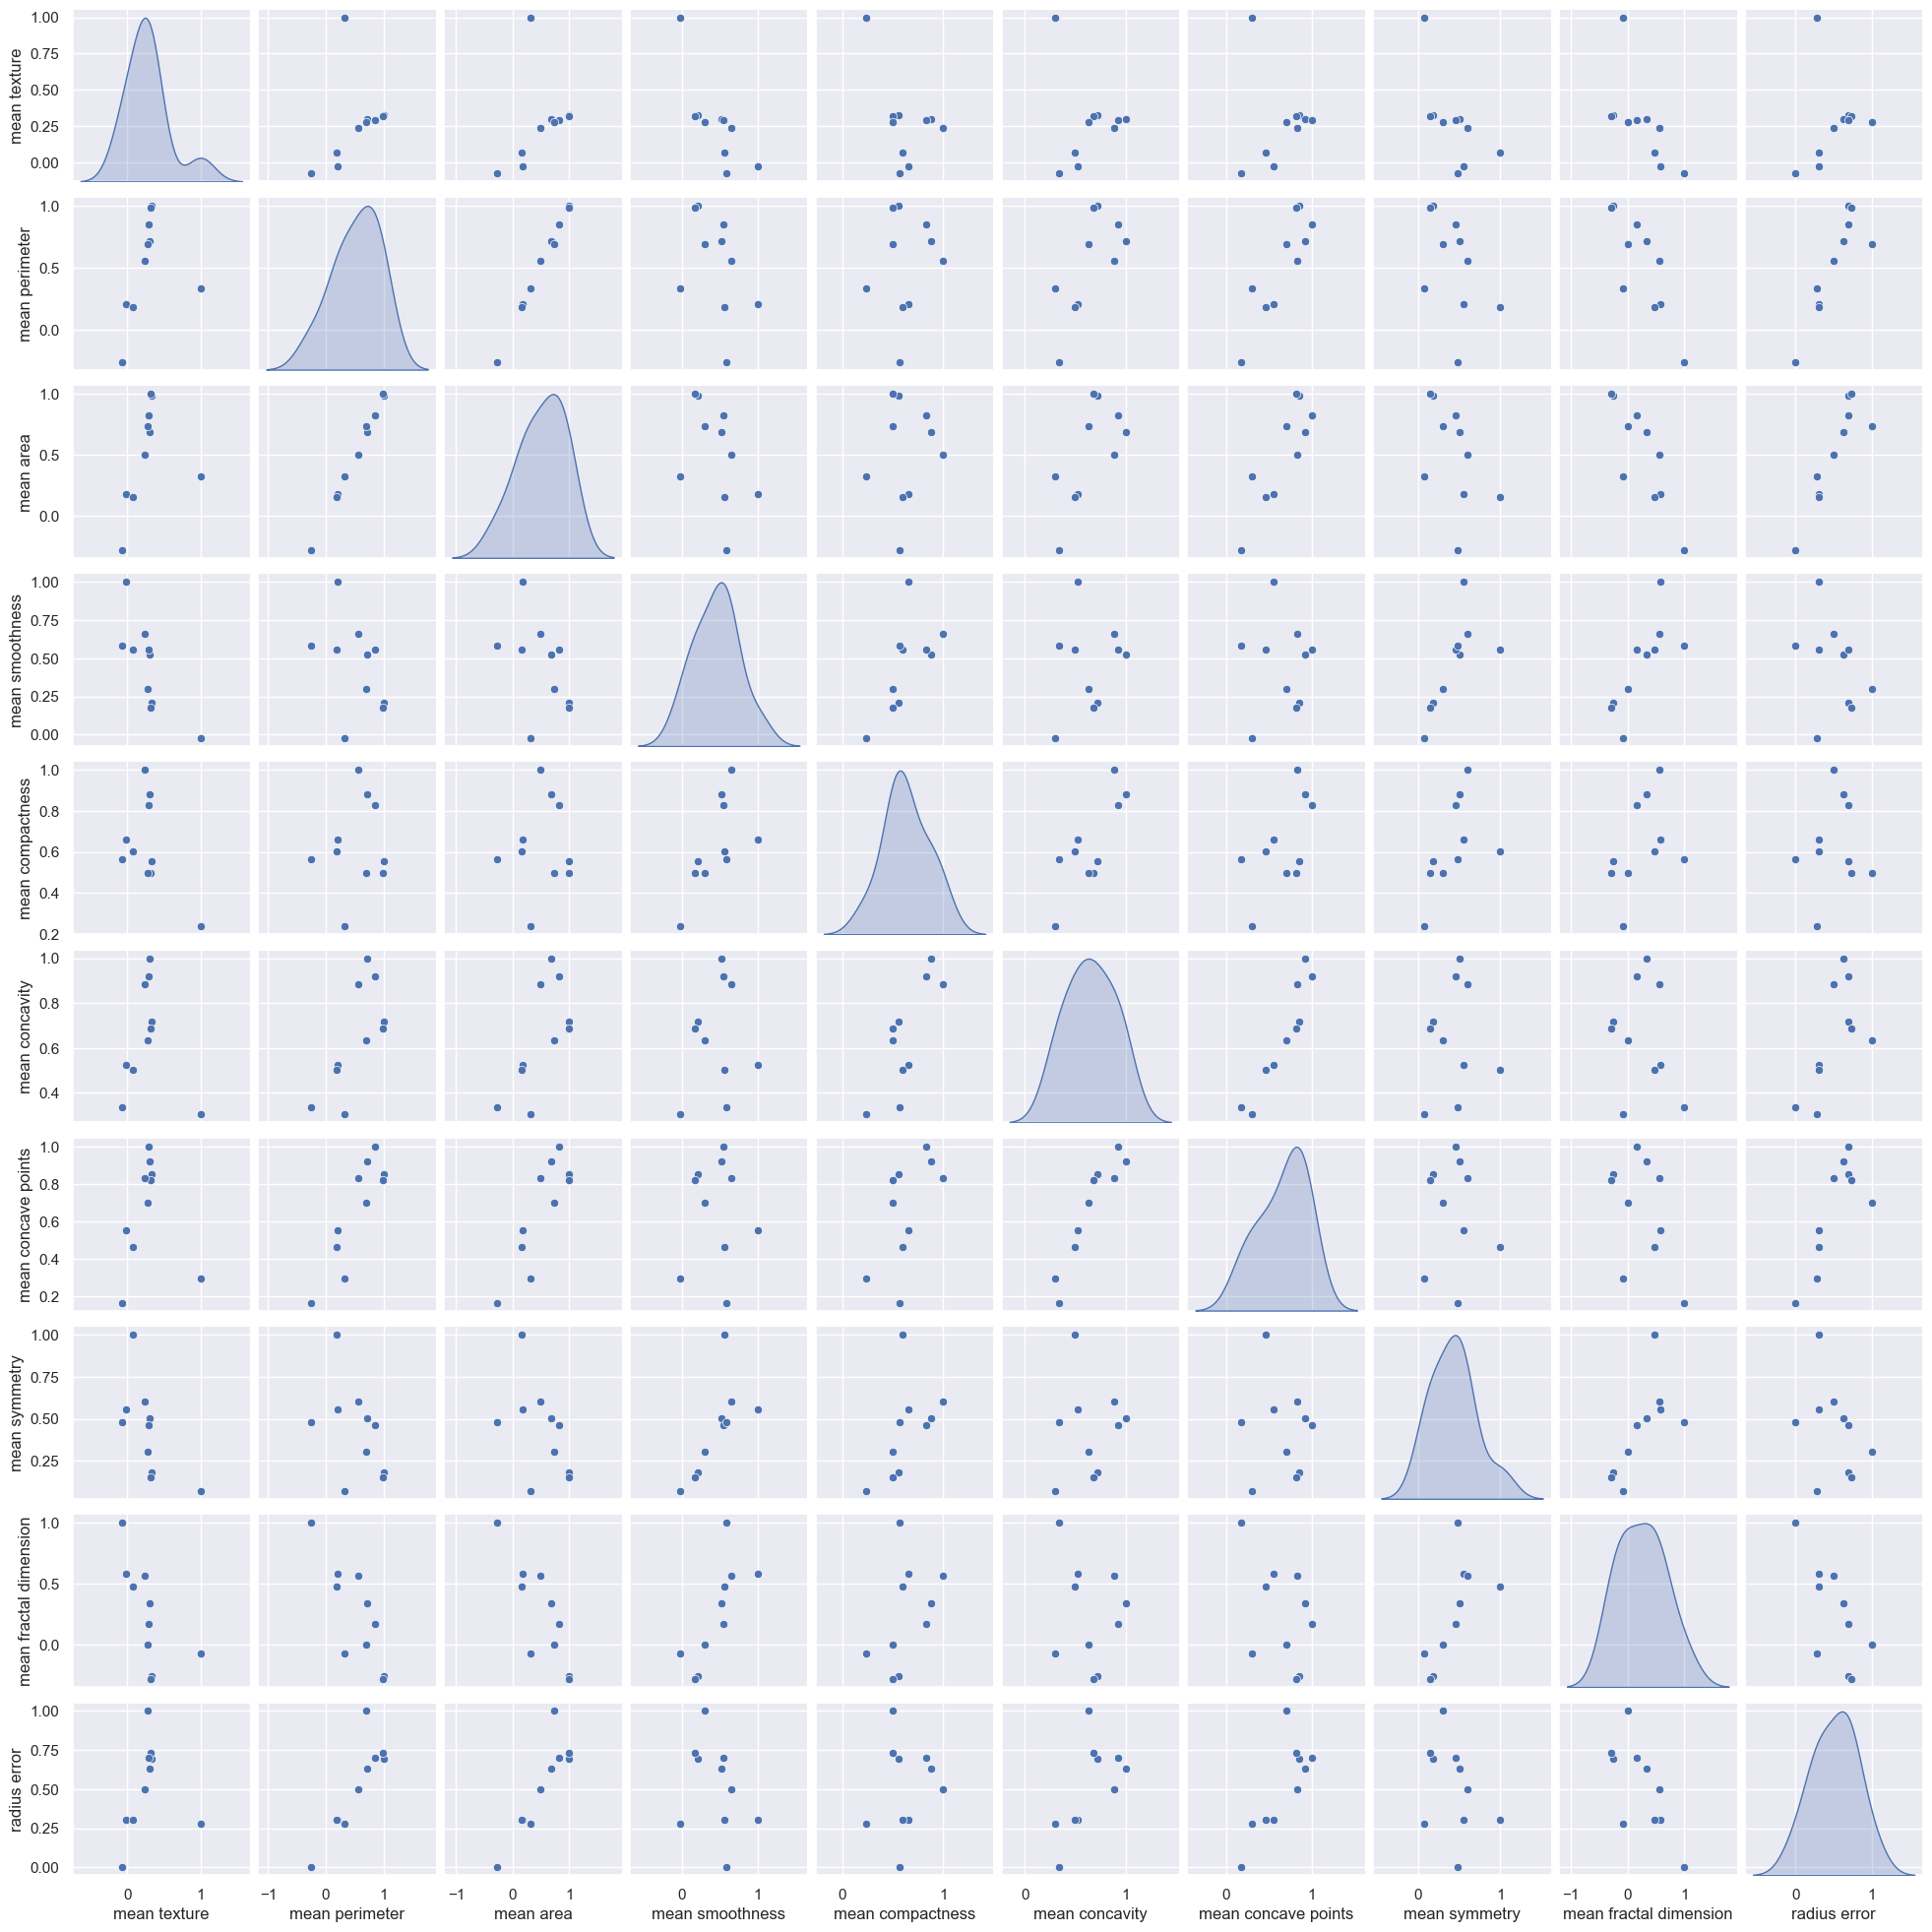

In [42]:
import seaborn as sns
featureMeans = list(df[0].columns[1:11])
correlationData = df[0][featureMeans].corr()
sns.pairplot(df[0][featureMeans].corr(), diag_kind='kde', size=2);

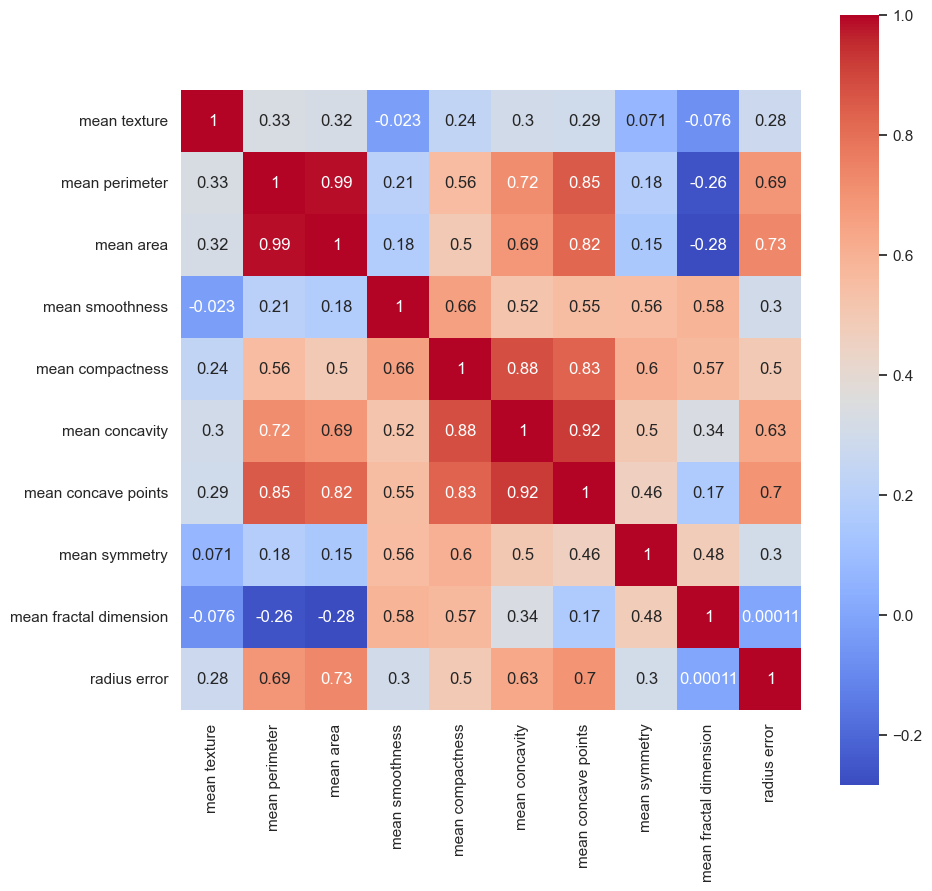

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df[0][featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

We choose two variables "mean radius"and "mean texture" to classify y labels with 0 and 1.

In [50]:
y = df[1].iloc[0:100]
y = np.where(y == 0,-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1])

In [51]:
X = df[0][["mean radius", "mean texture"]].iloc[:100].values
y = df[1].iloc[0:100]
y = np.where(y == 0,-1,1)
X = df[0][["mean radius", "mean texture"]].iloc[:100].values
X

array([[17.99 , 10.38 ],
       [20.57 , 17.77 ],
       [19.69 , 21.25 ],
       [11.42 , 20.38 ],
       [20.29 , 14.34 ],
       [12.45 , 15.7  ],
       [18.25 , 19.98 ],
       [13.71 , 20.83 ],
       [13.   , 21.82 ],
       [12.46 , 24.04 ],
       [16.02 , 23.24 ],
       [15.78 , 17.89 ],
       [19.17 , 24.8  ],
       [15.85 , 23.95 ],
       [13.73 , 22.61 ],
       [14.54 , 27.54 ],
       [14.68 , 20.13 ],
       [16.13 , 20.68 ],
       [19.81 , 22.15 ],
       [13.54 , 14.36 ],
       [13.08 , 15.71 ],
       [ 9.504, 12.44 ],
       [15.34 , 14.26 ],
       [21.16 , 23.04 ],
       [16.65 , 21.38 ],
       [17.14 , 16.4  ],
       [14.58 , 21.53 ],
       [18.61 , 20.25 ],
       [15.3  , 25.27 ],
       [17.57 , 15.05 ],
       [18.63 , 25.11 ],
       [11.84 , 18.7  ],
       [17.02 , 23.98 ],
       [19.27 , 26.47 ],
       [16.13 , 17.88 ],
       [16.74 , 21.59 ],
       [14.25 , 21.72 ],
       [13.03 , 18.42 ],
       [14.99 , 25.2  ],
       [13.48 , 20.82 ],


### Define the function

In [53]:
class Perceptron(object):
    """
    A class used to represent a single-layer Perceptron. 

    ...

    Attributes
    ----------
    eta : float
        The learning rate used for weight updates during training. Default is 0.5.

    epochs : int
        The number of passes over the training dataset. Default is 50.

    Methods
    -------
    train(self, X, y)
        Trains the perceptron on the training data using stochastic gradient descent.
        X is the feature matrix of shape [n_samples, n_features], and y is the target
        vector of shape [n_samples]. Returns the trained perceptron.

    net_input(self, X)
        Computes the net input of the perceptron for the given feature matrix X.

    predict(self, X)
        Predicts the class label for each sample in the feature matrix X.

    """
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
                #print(self.errors_)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [54]:
percep = Perceptron(epochs = 500)
percep.train(X, y)

In [55]:
y_hat = percep.predict(X)
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False False False False False  True  True False  True  True False  True
 False False  True  True  True  True False False False False  True  True
  True  True False  True False  True  True False False False  True  True
 False  True  True  True False False False  True False False  True  True
 False False False  True]


We can visualize this in the Euclidian plane. This function will scatter the breast cancer data in the plane and also show the regions of space where a given point will be classified either -1 or 1.

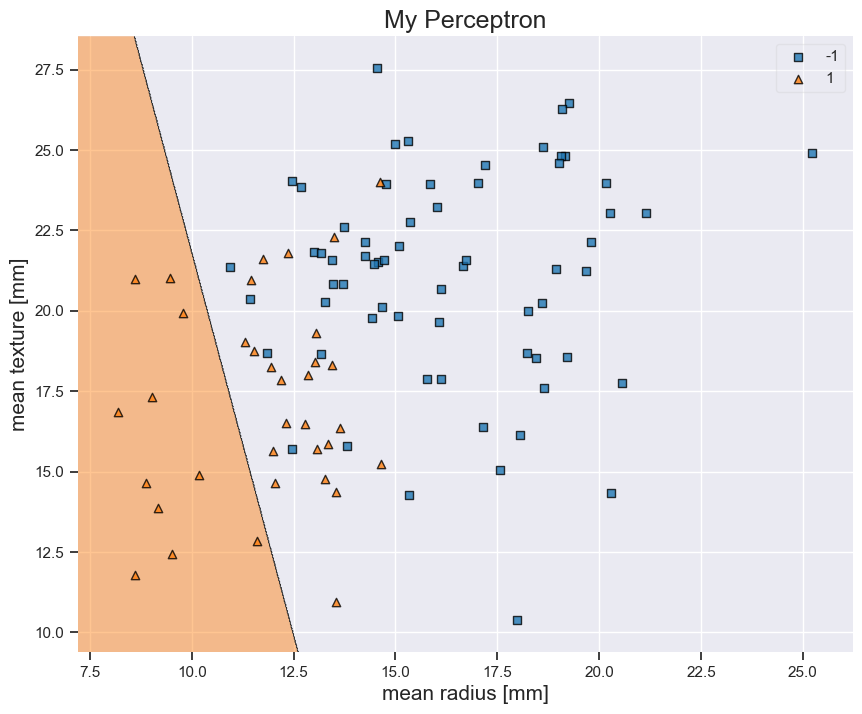

In [47]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My Perceptron", fontsize = 18)
plt.xlabel("mean radius [mm]", fontsize = 15)
plt.ylabel("mean texture [mm]", fontsize = 15)
plt.show()

It seensl like the linear decision boundary did not sperate the two group very well. Now we view these errors over each epoch.

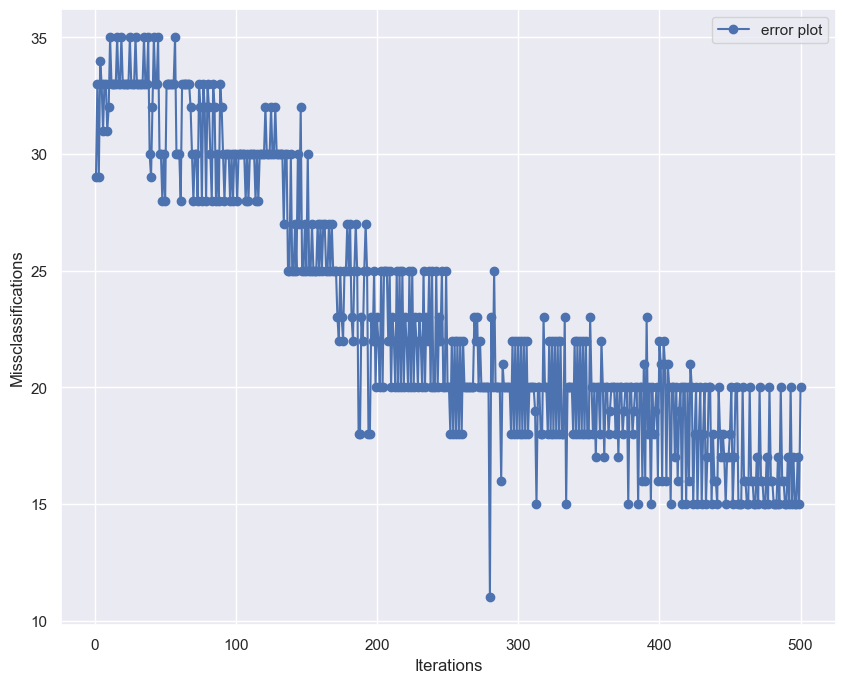

In [48]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

Since the linear decision boundary did not sperate the two group very well, now we train this instance over 5000 epochs.

In [52]:
percep = Perceptron(epochs = 5000)
percep.train(X, y)
y_hat = percep.predict(X)
print(y == y_hat)

[ True  True  True False  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True False  True  True  True False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True]


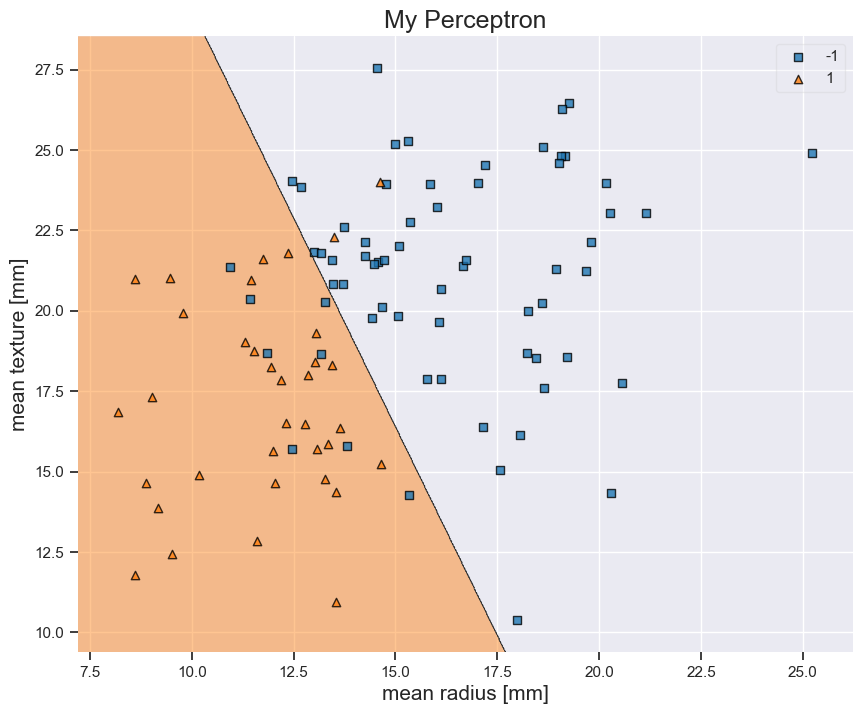

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My Perceptron", fontsize = 18)
plt.xlabel("mean radius [mm]", fontsize = 15)
plt.ylabel("mean texture [mm]", fontsize = 15)
plt.show()

This model with 5000 epochs did a better work than the model with 500 epochs.

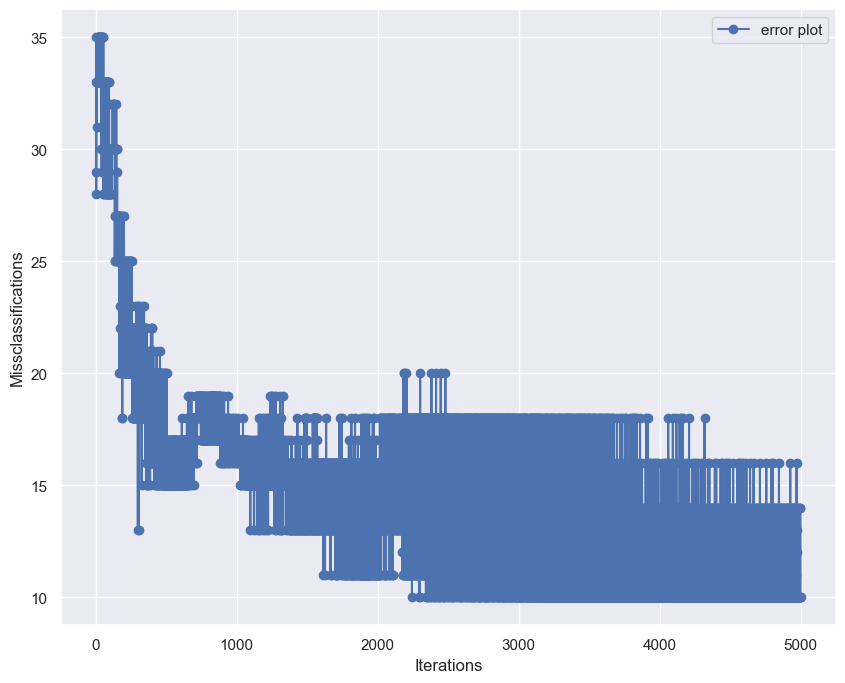

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()